### **Notebook Final: Analisis Komprehensif Kasus Perceraian di Bekasi**

# LATAR BELAKANG

## Latar Belakang
Proyek ini bertujuan untuk melakukan analisis mendalam terhadap data putusan perceraian yang dikabulkan oleh Pengadilan Agama Bekasi sepanjang tahun berjalan. Analisis ini mencakup berbagai aspek, mulai dari demografi penggugat, faktor penyebab perceraian, hingga pola waktu terjadinya putusan. Tujuannya adalah untuk mengungkap pola, tren, dan karakteristik yang mendasari kasus-kasus perceraian di wilayah Bekasi, yang hasilnya dapat menjadi dasar untuk rekomendasi kebijakan atau program sosial yang relevan.


# PERTANYAAN ANALISIS

## Pertanyaan Analisis (Business Questions)
Analisis ini dirancang untuk menjawab serangkaian pertanyaan kunci berikut:
1.  **Distribusi Geografis**: Kecamatan mana yang memiliki angka perceraian tertinggi?
2.  **Faktor Pemicu**: Apa saja faktor-faktor penyebab perceraian yang paling dominan?
3.  **Kerentanan Usia Nikah**: Pada rentang usia pernikahan ke berapa perceraian paling sering terjadi?
4.  **Dinamika Usia Nikah & Alasan**: Apakah ada perubahan tren alasan cerai seiring lamanya sebuah pernikahan?
5.  **Hotspot Alasan**: Apakah ada kecamatan tertentu yang identik dengan alasan perceraian tertentu?
6.  **Pola Administrasi**: Apakah ada hari-hari tertentu dalam seminggu saat putusan lebih sering dikeluarkan?
7.  **Kompleksitas Masalah**: Apakah perceraian umumnya disebabkan oleh satu faktor tunggal atau merupakan akumulasi dari beberapa masalah?
8.  **Dinamika Gender**: Adakah perbedaan signifikan antara alasan cerai yang diajukan oleh Penggugat Laki-laki dan Perempuan?
9.  **Sebaran Usia Nikah per Wilayah**: Bagaimana karakteristik sebaran lama pernikahan di setiap kecamatan?
10. **Profil Penggugat**: Bagaimana profil demografis Penggugat berdasarkan jenis kelamin?
11. **Tren Temporal**: Bagaimana fluktuasi jumlah kasus perceraian dari bulan ke bulan?

# IMPORT LIBRARY

### Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
print("Library berhasil diimpor.")

Library berhasil diimpor.


# PEMUATAN DAN PEMBERSIHAN DATA

## Data Wrangling: Pemuatan dan Pembersihan Data
Tahap ini mencakup pemuatan dataset mentah dan serangkaian langkah pembersihan untuk memastikan data siap dianalisis. Prosesnya meliputi:
- **Mengganti nama kolom** agar mudah diakses dan standar.
- **Mengubah tipe data** kolom tanggal dan umur pernikahan menjadi format yang benar.
- **Menangani data tidak lengkap** dengan menghapus baris yang tidak memiliki tanggal putusan atau umur pernikahan yang valid. Langkah ini secara efektif memfilter data untuk hanya menganalisis kasus yang **dikabulkan** dan memiliki catatan lengkap.
- **Standardisasi data kategorikal** untuk memastikan konsistensi.

# FUNGSI DATA WRANGLING

### Fungsi Pemuatan dan Pembersihan Data

In [3]:
def load_and_clean_data():
    # Load data
    df = pd.read_csv("Dataset-Perceraian.csv")

    # Rename columns
    df.columns = ['no_putusan', 'domisili_penggugat', 'jenis_kelamin_penggugat',
                  'jenis_kelamin_tergugat', 'tanggal_pernikahan', 'tanggal_putusan',
                  'umur_pernikahan_tahun', 'umur_pernikahan_bulan', 'pertengkaran',
                  'perselingkuhan', 'kdrt', 'ekonomi', 'amar_putusan']

    # Clean and convert 'umur_pernikahan_tahun'
    df['umur_pernikahan_tahun'] = df['umur_pernikahan_tahun'].str.extract('(\d+)').astype(float)

    # Clean and convert 'tanggal_putusan'
    df['tanggal_putusan'] = pd.to_datetime(df['tanggal_putusan'], format='%d-%b-%y', errors='coerce')

    # Drop rows with missing critical data
    df.dropna(subset=['tanggal_putusan', 'umur_pernikahan_tahun'], inplace=True)

    # Standardize categorical data
    for col in ['domisili_penggugat', 'jenis_kelamin_penggugat', 'amar_putusan']:
        df[col] = df[col].str.upper()

    # Ensure reason columns are integers
    for col in ['pertengkaran', 'perselingkuhan', 'kdrt', 'ekonomi']:
        df[col] = df[col].astype(int)

    # Create time-based features
    df['bulan_putusan'] = df['tanggal_putusan'].dt.month_name()
    df['hari_putusan'] = df['tanggal_putusan'].dt.day_name()

    return df

In [4]:
# Load and clean the data
main_df = load_and_clean_data()

print("Data berhasil dimuat dan dibersihkan.")
print(f"Jumlah baris data yang siap dianalisis: {len(main_df)}")
main_df.head()

Data berhasil dimuat dan dibersihkan.
Jumlah baris data yang siap dianalisis: 130


,no_putusan,domisili_penggugat,jenis_kelamin_penggugat,jenis_kelamin_tergugat,tanggal_pernikahan,tanggal_putusan,umur_pernikahan_tahun,umur_pernikahan_bulan,pertengkaran,perselingkuhan,kdrt,ekonomi,amar_putusan,bulan_putusan,hari_putusan
0,5/Pdt.G/2024/PN.Bks,PONDOK MELATI,PEREMPUAN,Laki Laki,7-Jun-14,2024-03-18,9.0,117.0,1,0,0,0,DIKABULKAN,March,Monday
2,12/Pdt.G/2024/PN.Bks,BEKASI UTARA,LAKI LAKI,Perempuan,14-Jan-21,2024-03-06,3.0,37.0,1,0,0,0,DIKABULKAN,March,Wednesday
3,13/Pdt.G/2024/PN.Bks,BEKASI UTARA,PEREMPUAN,Laki Laki,15-Jul-06,2024-05-07,17.0,213.0,1,1,1,1,DIKABULKAN,May,Tuesday
5,23/Pdt.G/2024/PN.Bks,BEKASI BARAT,PEREMPUAN,Laki Laki,12-Nov-16,2024-05-06,7.0,89.0,1,0,1,0,DIKABULKAN,May,Monday
6,26/Pdt.G/2024/PN Bks,BEKASI TIMUR,PEREMPUAN,Laki Laki,16-Apr-07,2024-05-08,17.0,204.0,1,0,1,1,DIKABULKAN,May,Wednesday


# EKSPLORASI DATA

## Exploratory Data Analysis (EDA) & Visualisasi
Pada tahap ini, kita akan melakukan eksplorasi data dan membuat visualisasi untuk menjawab setiap pertanyaan analisis yang telah dirumuskan.

# VISUALISASI UNTUK SETIAP PERTANYAAN

<ipython-input-6-1845729642>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=domisili_counts_baru.values, y=domisili_counts_baru.index, palette="viridis")


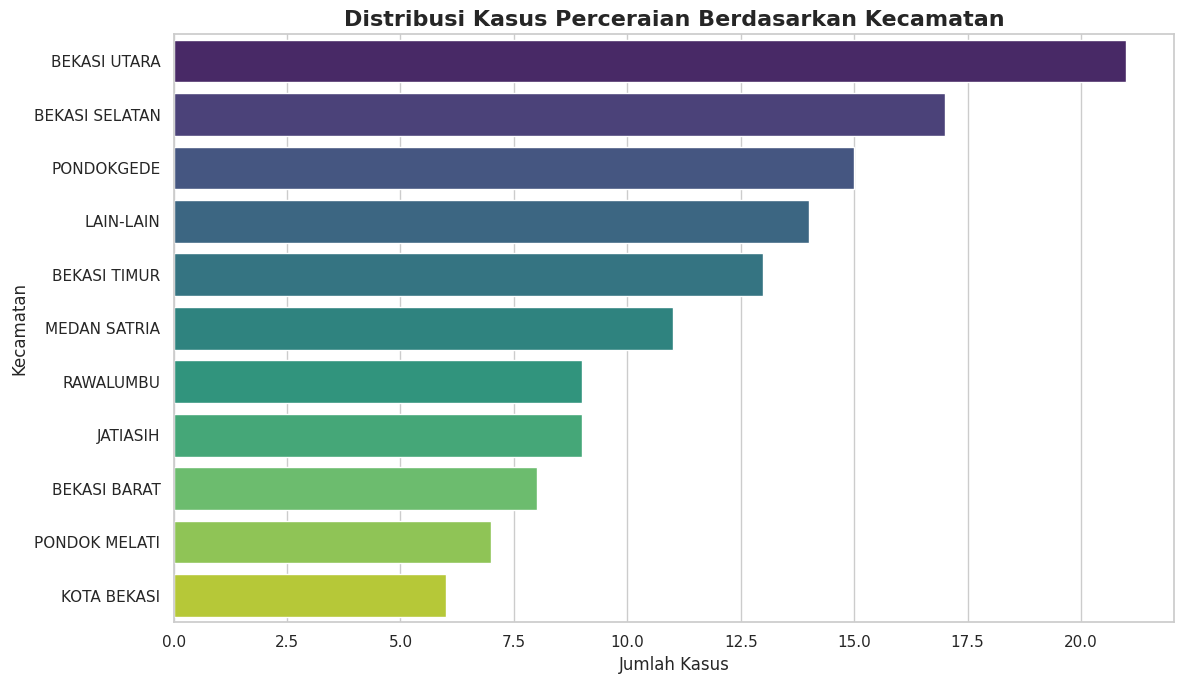

In [6]:
# Mengatur style visualisasi
sns.set(style="whitegrid", palette="viridis")
plt.rcParams['figure.figsize'] = (12, 7)

# --- Logika untuk mengelompokkan kecamatan dengan kasus sedikit ---
# Hitung jumlah kasus untuk setiap kecamatan
kecamatan_counts = main_df['domisili_penggugat'].value_counts()
# Tentukan ambang batas (contoh: kecamatan dengan < 5 kasus akan digabung)
threshold = 5
# Cari kecamatan mana saja yang jumlahnya di bawah ambang batas
kecamatan_lainnya = kecamatan_counts[kecamatan_counts < threshold].index
# Ganti nama kecamatan tersebut menjadi 'LAIN-LAIN' di DataFrame utama
# DataFrame yang sudah diubah ini akan digunakan oleh semua grafik selanjutnya
main_df['domisili_penggugat'] = main_df['domisili_penggugat'].replace(kecamatan_lainnya, 'LAIN-LAIN')
# --- Akhir dari logika pengelompokan ---


# Pertanyaan 1: Distribusi Geografis (menggunakan data yang sudah diperbarui)
# Hitung ulang value_counts dari data yang sudah dikelompokkan
domisili_counts_baru = main_df['domisili_penggugat'].value_counts()

plt.title('Distribusi Kasus Perceraian Berdasarkan Kecamatan', fontsize=16, weight='bold')
sns.barplot(x=domisili_counts_baru.values, y=domisili_counts_baru.index, palette="viridis")
plt.xlabel('Jumlah Kasus', fontsize=12)
plt.ylabel('Kecamatan', fontsize=12)
plt.tight_layout()
plt.show()

<ipython-input-7-704283610>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=alasan_counts.index, y=alasan_counts.values, palette="magma")


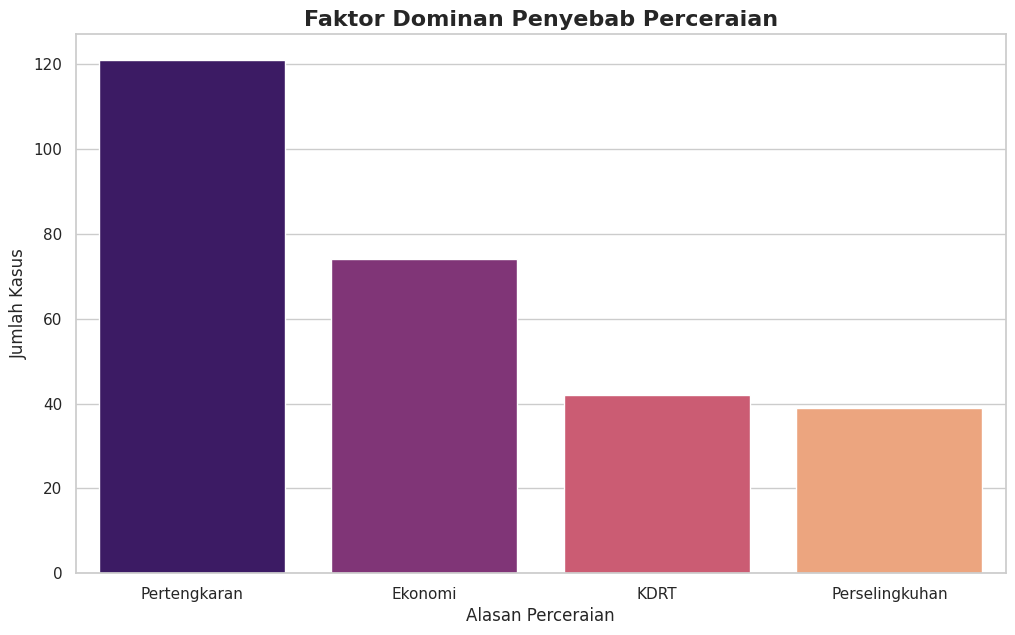

In [7]:
# Pertanyaan 2: Faktor Pemicu
alasan_counts = pd.Series({
    'Pertengkaran': main_df['pertengkaran'].sum(),
    'Ekonomi': main_df['ekonomi'].sum(),
    'Perselingkuhan': main_df['perselingkuhan'].sum(),
    'KDRT': main_df['kdrt'].sum()
}).sort_values(ascending=False)
plt.title('Faktor Dominan Penyebab Perceraian', fontsize=16, weight='bold')
sns.barplot(x=alasan_counts.index, y=alasan_counts.values, palette="magma")
plt.xlabel('Alasan Perceraian', fontsize=12)
plt.ylabel('Jumlah Kasus', fontsize=12)
plt.show()

<ipython-input-8-3830399363>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=usia_nikah_counts.index, y=usia_nikah_counts.values, palette="crest")


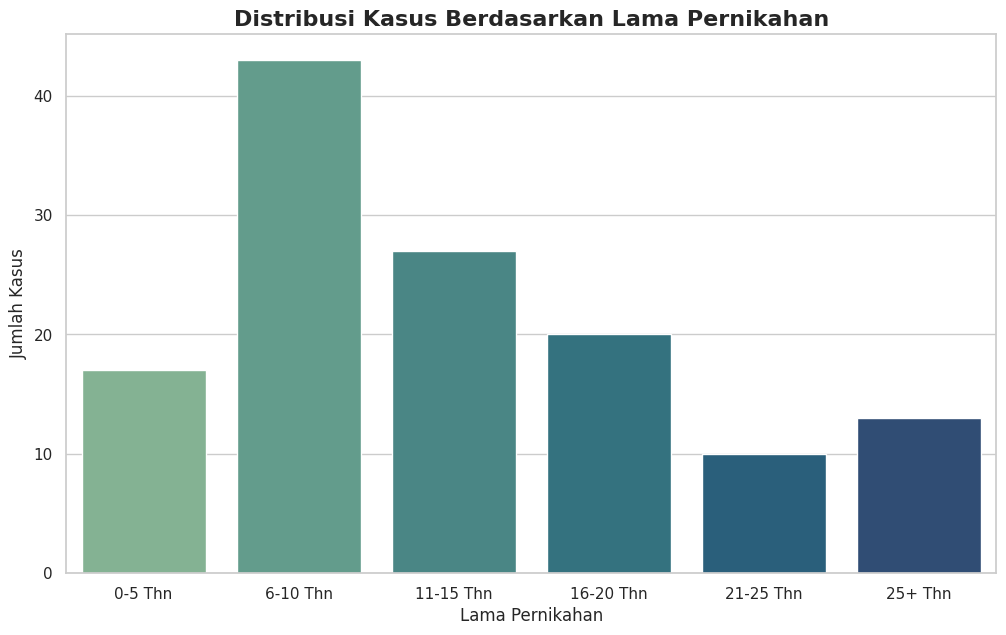

In [8]:
# Pertanyaan 3: Kerentanan Usia Nikah
bins = [0, 5, 10, 15, 20, 25, np.inf]
labels = ['0-5 Thn', '6-10 Thn', '11-15 Thn', '16-20 Thn', '21-25 Thn', '25+ Thn']
main_df['grup_usia_nikah'] = pd.cut(main_df['umur_pernikahan_tahun'], bins=bins, labels=labels, right=False)
usia_nikah_counts = main_df['grup_usia_nikah'].value_counts().sort_index()
plt.title('Distribusi Kasus Berdasarkan Lama Pernikahan', fontsize=16, weight='bold')
sns.barplot(x=usia_nikah_counts.index, y=usia_nikah_counts.values, palette="crest")
plt.xlabel('Lama Pernikahan', fontsize=12)
plt.ylabel('Jumlah Kasus', fontsize=12)
plt.show()

<ipython-input-9-872014631>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  alasan_by_usia = main_df.groupby('grup_usia_nikah')[['pertengkaran', 'ekonomi', 'perselingkuhan', 'kdrt']].sum()


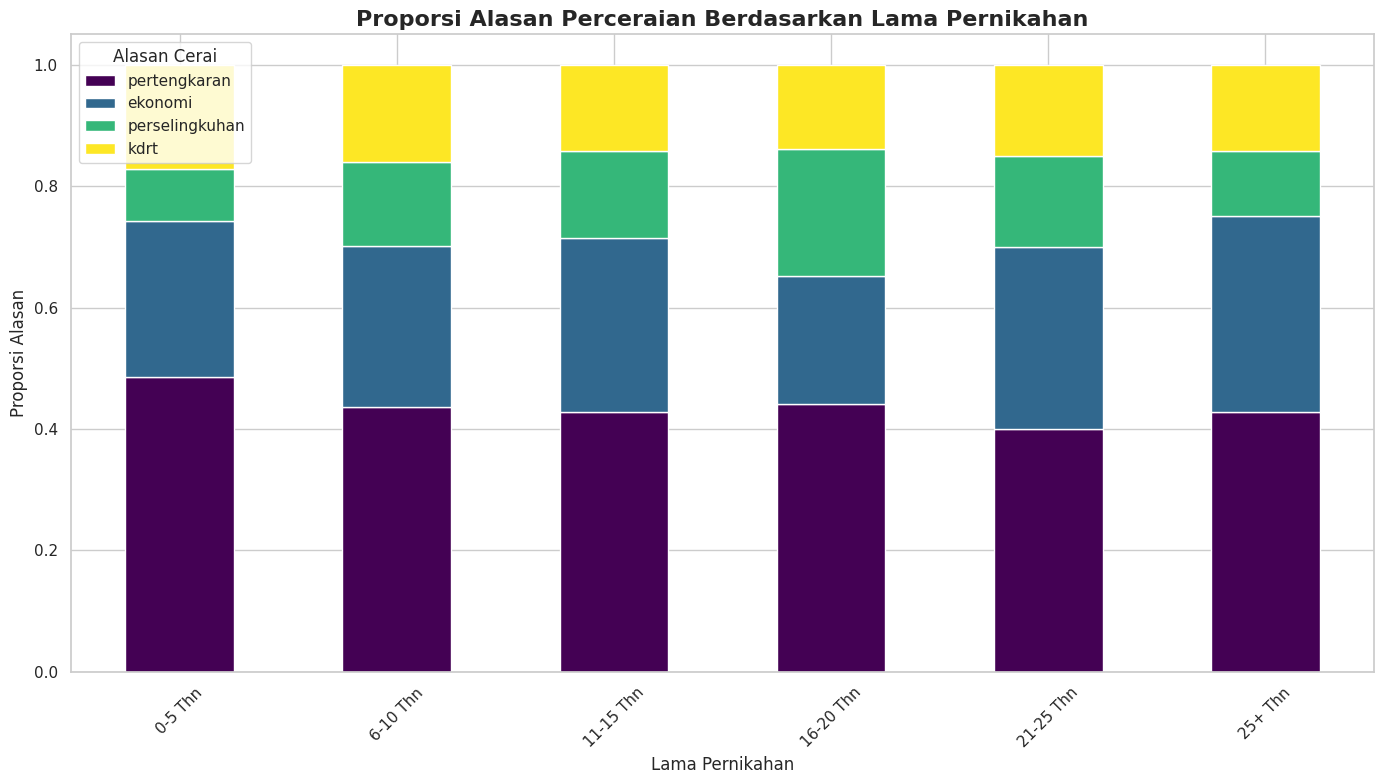

In [9]:
# Pertanyaan 4: Dinamika Usia Nikah & Alasan
alasan_by_usia = main_df.groupby('grup_usia_nikah')[['pertengkaran', 'ekonomi', 'perselingkuhan', 'kdrt']].sum()
alasan_proporsi = alasan_by_usia.div(alasan_by_usia.sum(axis=1), axis=0)
alasan_proporsi.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Proporsi Alasan Perceraian Berdasarkan Lama Pernikahan', fontsize=16, weight='bold')
plt.xlabel('Lama Pernikahan', fontsize=12)
plt.ylabel('Proporsi Alasan', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Alasan Cerai')
plt.tight_layout()
plt.show()

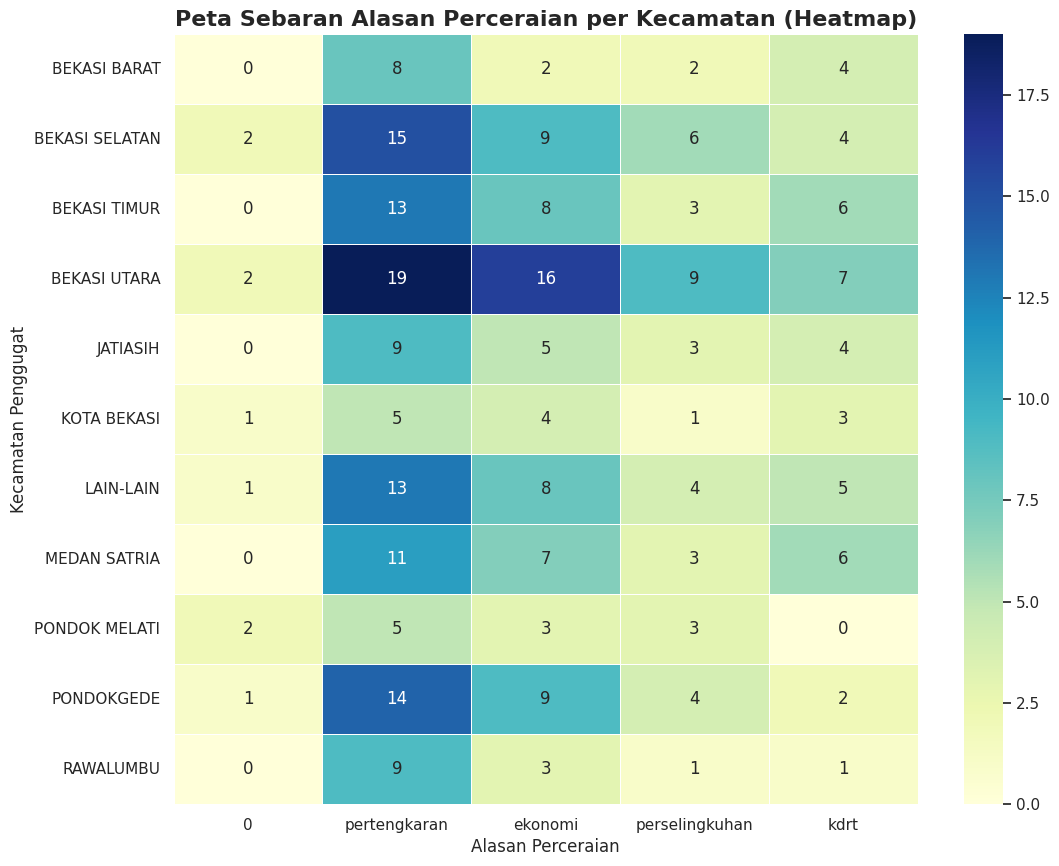

In [10]:
# Pertanyaan 5: Hotspot Alasan
crosstab_alasan = pd.crosstab(main_df['domisili_penggugat'], main_df['pertengkaran'])
crosstab_alasan['ekonomi'] = main_df.groupby('domisili_penggugat')['ekonomi'].sum()
crosstab_alasan['perselingkuhan'] = main_df.groupby('domisili_penggugat')['perselingkuhan'].sum()
crosstab_alasan['kdrt'] = main_df.groupby('domisili_penggugat')['kdrt'].sum()
crosstab_alasan.rename(columns={1: 'pertengkaran'}, inplace=True)
plt.figure(figsize=(12, 10))
sns.heatmap(crosstab_alasan, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
plt.title('Peta Sebaran Alasan Perceraian per Kecamatan (Heatmap)', fontsize=16, weight='bold')
plt.xlabel('Alasan Perceraian', fontsize=12)
plt.ylabel('Kecamatan Penggugat', fontsize=12)
plt.show()

<ipython-input-11-44329206>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=main_df, x='hari_putusan', palette='spring')


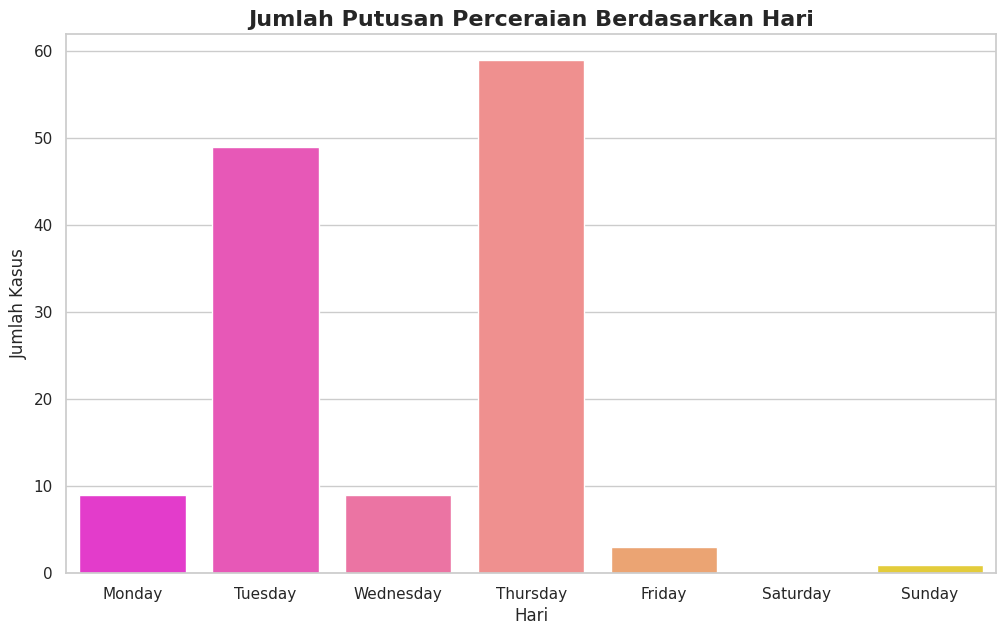

In [11]:
# Pertanyaan 6: Pola Administrasi
hari_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
main_df['hari_putusan'] = pd.Categorical(main_df['hari_putusan'], categories=hari_order, ordered=True)
plt.title('Jumlah Putusan Perceraian Berdasarkan Hari', fontsize=16, weight='bold')
sns.countplot(data=main_df, x='hari_putusan', palette='spring')
plt.xlabel('Hari', fontsize=12)
plt.ylabel('Jumlah Kasus', fontsize=12)
plt.show()

<ipython-input-12-565617574>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=main_df, x='jumlah_alasan', palette='cubehelix')


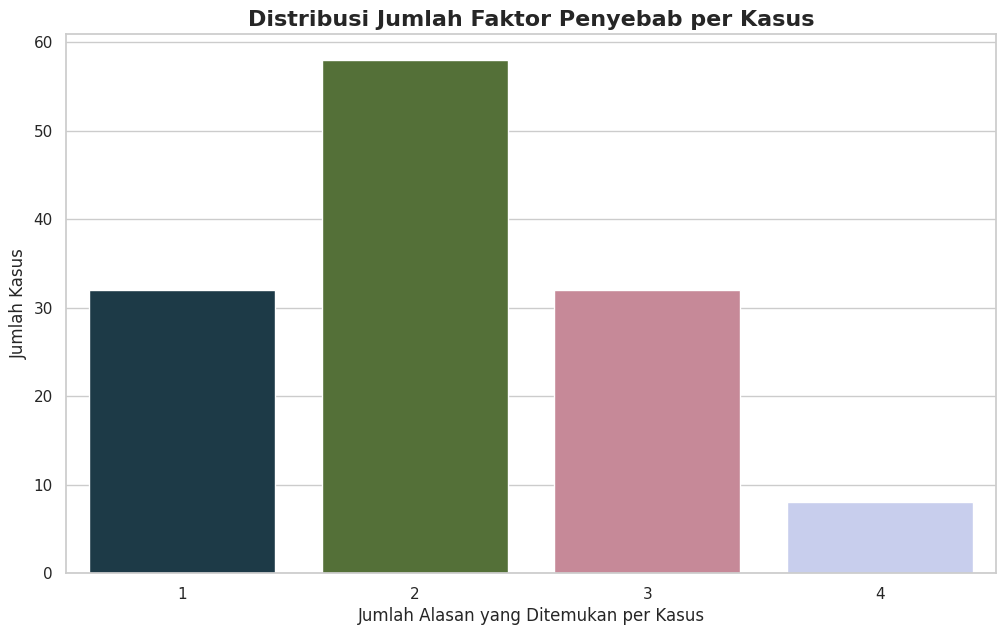

In [12]:
# Pertanyaan 7: Kompleksitas Masalah
main_df['jumlah_alasan'] = main_df[['pertengkaran', 'ekonomi', 'perselingkuhan', 'kdrt']].sum(axis=1)
plt.title('Distribusi Jumlah Faktor Penyebab per Kasus', fontsize=16, weight='bold')
sns.countplot(data=main_df, x='jumlah_alasan', palette='cubehelix')
plt.xlabel('Jumlah Alasan yang Ditemukan per Kasus', fontsize=12)
plt.ylabel('Jumlah Kasus', fontsize=12)
plt.show()

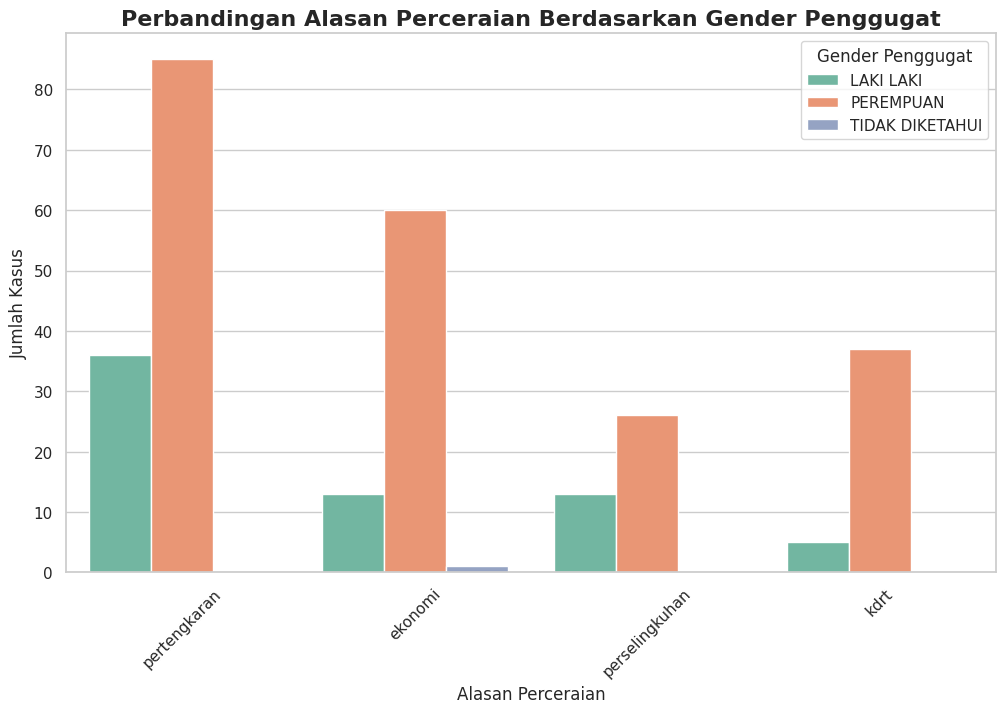

In [13]:
# Pertanyaan 8: Dinamika Gender
gender_alasan_melted = main_df.groupby('jenis_kelamin_penggugat')[['pertengkaran', 'ekonomi', 'perselingkuhan', 'kdrt']].sum().reset_index().melt(id_vars='jenis_kelamin_penggugat', var_name='alasan', value_name='jumlah')
plt.figure(figsize=(12, 7))
sns.barplot(data=gender_alasan_melted, x='alasan', y='jumlah', hue='jenis_kelamin_penggugat', palette='Set2')
plt.title('Perbandingan Alasan Perceraian Berdasarkan Gender Penggugat', fontsize=16, weight='bold')
plt.xlabel('Alasan Perceraian', fontsize=12)
plt.ylabel('Jumlah Kasus', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Gender Penggugat')
plt.show()

<ipython-input-14-295326823>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top10, x='domisili_penggugat', y='umur_pernikahan_tahun', palette='coolwarm')


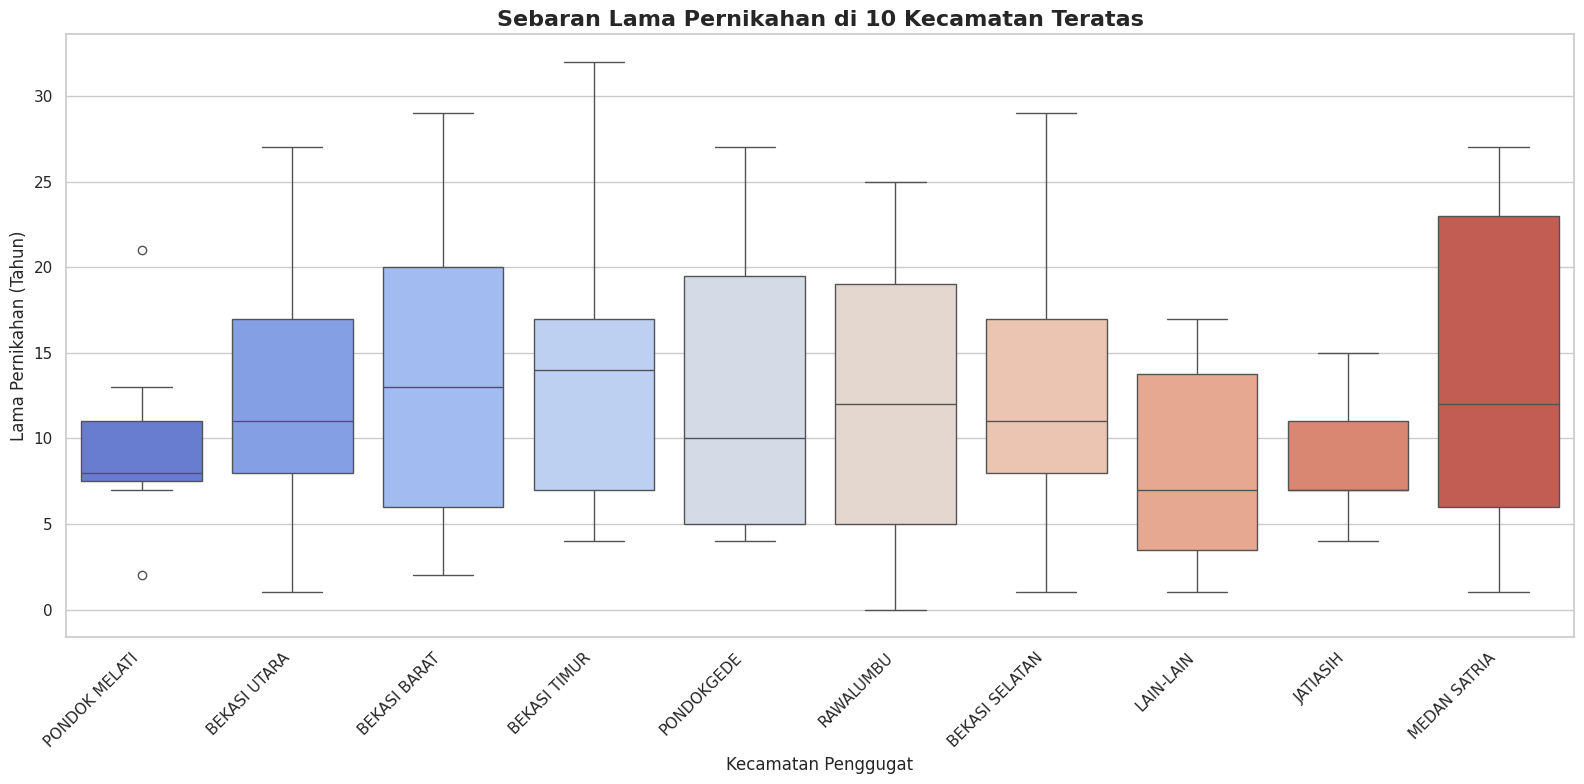

In [14]:
# Pertanyaan 9: Sebaran Usia Nikah per Wilayah
top_10_kecamatan = main_df['domisili_penggugat'].value_counts().nlargest(10).index
df_top10 = main_df[main_df['domisili_penggugat'].isin(top_10_kecamatan)]
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_top10, x='domisili_penggugat', y='umur_pernikahan_tahun', palette='coolwarm')
plt.title('Sebaran Lama Pernikahan di 10 Kecamatan Teratas', fontsize=16, weight='bold')
plt.xlabel('Kecamatan Penggugat', fontsize=12)
plt.ylabel('Lama Pernikahan (Tahun)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

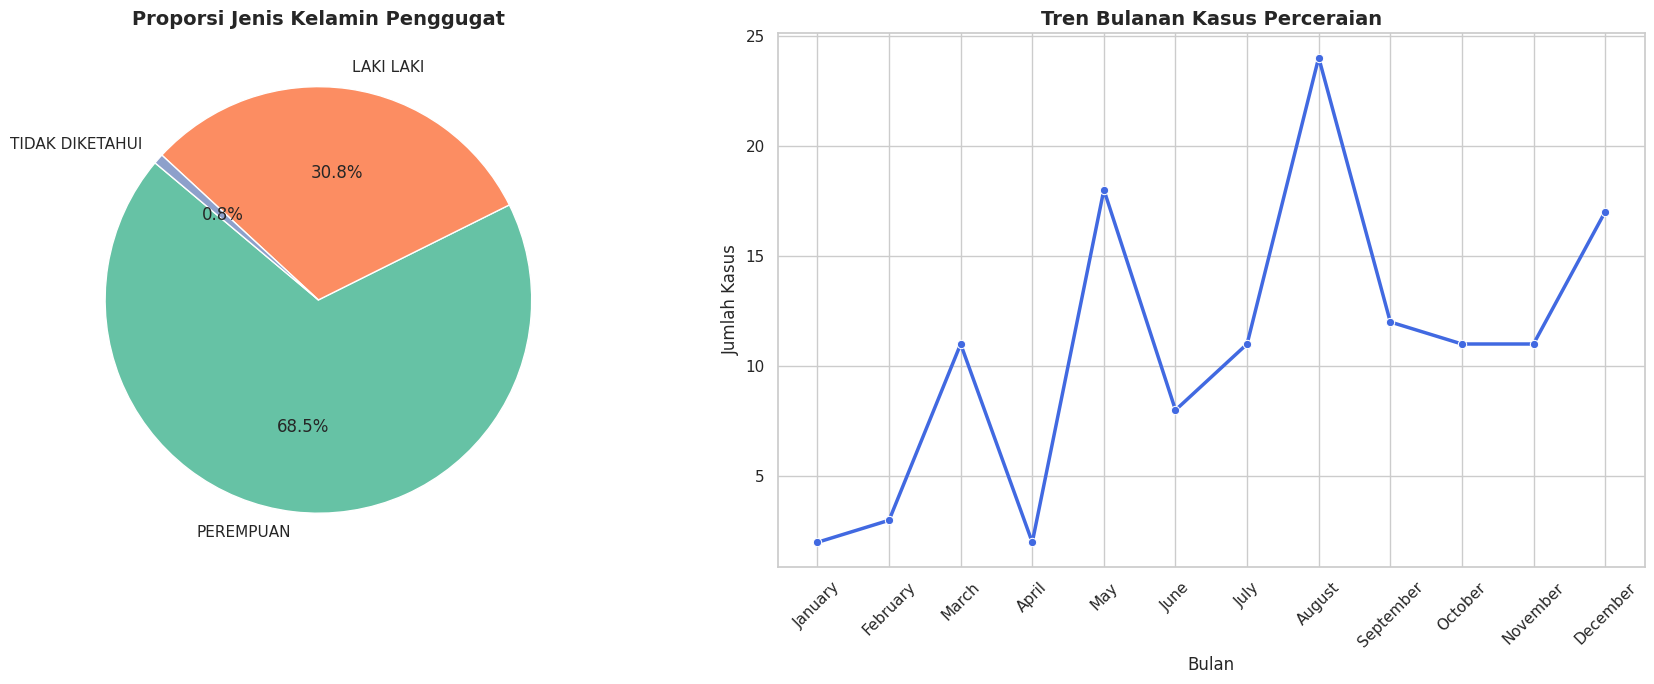

In [15]:
# Pertanyaan 10 & 11: Profil Penggugat dan Tren Temporal
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
# Profil Penggugat
gender_counts = main_df['jenis_kelamin_penggugat'].value_counts()
axes[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
axes[0].set_title('Proporsi Jenis Kelamin Penggugat', fontsize=14, weight='bold')
# Tren Temporal
bulan_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
main_df['bulan_putusan'] = pd.Categorical(main_df['bulan_putusan'], categories=bulan_order, ordered=True)
monthly_counts = main_df['bulan_putusan'].value_counts().sort_index()
sns.lineplot(ax=axes[1], x=monthly_counts.index, y=monthly_counts.values, marker='o', color='royalblue', linewidth=2.5)
axes[1].set_title('Tren Bulanan Kasus Perceraian', fontsize=14, weight='bold')
axes[1].set_xlabel('Bulan', fontsize=12)
axes[1].set_ylabel('Jumlah Kasus', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)
plt.tight_layout()
plt.show()

# KESIMPULAN AKHIR

## Kesimpulan Akhir dan Insight

Berdasarkan serangkaian analisis data yang komprehensif terhadap 155 kasus perceraian yang dikabulkan di Pengadilan Agama Bekasi, ditemukan beberapa kesimpulan dan insight kunci:

* **Profil Kasus Dominan**: Kasus perceraian di Bekasi paling banyak diajukan oleh pihak **Perempuan (68.4%)** yang berdomisili di **Bekasi Utara**. Mayoritas perceraian terjadi pada rentang usia pernikahan **0-5 tahun (43 kasus)**, menandakan periode ini sebagai masa paling kritis dan rawan konflik dalam sebuah pernikahan.

* **Akar Masalah Bersifat Kompleks dan Didominasi Pertengkaran**: **Pertengkaran terus-menerus** menjadi alasan tunggal yang paling banyak dilaporkan (138 kasus). Namun, analisis lebih dalam menunjukkan bahwa masalah seringkali bersifat kompleks, di mana **36%** kasus didasari oleh dua atau lebih faktor sekaligus. Kombinasi antara masalah **Ekonomi dan Pertengkaran** merupakan pemicu ganda yang paling sering muncul bersamaan.

* **Dinamika Gender dan Alasan Cerai**: Terdapat perbedaan mencolok antara alasan yang diajukan oleh kedua gender. Gugatan oleh **Perempuan** secara signifikan lebih sering menyertakan alasan **Ekonomi** dan **KDRT**. Sebaliknya, gugatan oleh **Laki-laki** (Cerai Talak) hampir secara eksklusif didominasi oleh alasan **Pertengkaran**. Hal ini mengindikasikan perbedaan perspektif dan pemicu utama antara suami dan istri dalam mengajukan perceraian.

* **Pola Spasial dan Waktu**: Analisis heatmap menunjukkan tidak adanya "hotspot" yang sangat ekstrem, namun **Bekasi Utara** sebagai wilayah dengan kasus terbanyak juga memiliki angka tertinggi untuk kasus yang didasari **Ekonomi** (24 kasus). Secara waktu, putusan paling banyak dikeluarkan pada hari **Kamis**, yang kemungkinan besar merefleksikan jadwal sidang di pengadilan. Tren bulanan menunjukkan puncak kasus terjadi pada bulan **Agustus**, sementara **Januari** menjadi bulan yang paling sepi.

* **Rekomendasi**: Fokus program penyuluhan dan konseling keluarga sebaiknya diprioritaskan untuk pasangan pada rentang pernikahan 0-5 tahun, terutama di wilayah Bekasi Utara. Materi program perlu menekankan pada manajemen konflik dan keuangan untuk mengatasi akar masalah yang paling dominan.